<a href="https://colab.research.google.com/github/sagartv/diabetes_risk_predictor/blob/main/diabetes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = None
pd.options.display.width = None


In [2]:
from dotenv import load_dotenv
load_dotenv()
MLFLOW_TRACKING_URI = os.environ.get('MLFLOW_TRACKING_URI')
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Obtain dataset diabetes_binary_health_indicators_BRFSS2015.csv from:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_health_indicators_BRFSS2015.csv

In [3]:
db = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')



# Exploratory Data Analysis

In [4]:
db.head(3)



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [5]:
db.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
db.shape

(253680, 22)

In [7]:
db.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

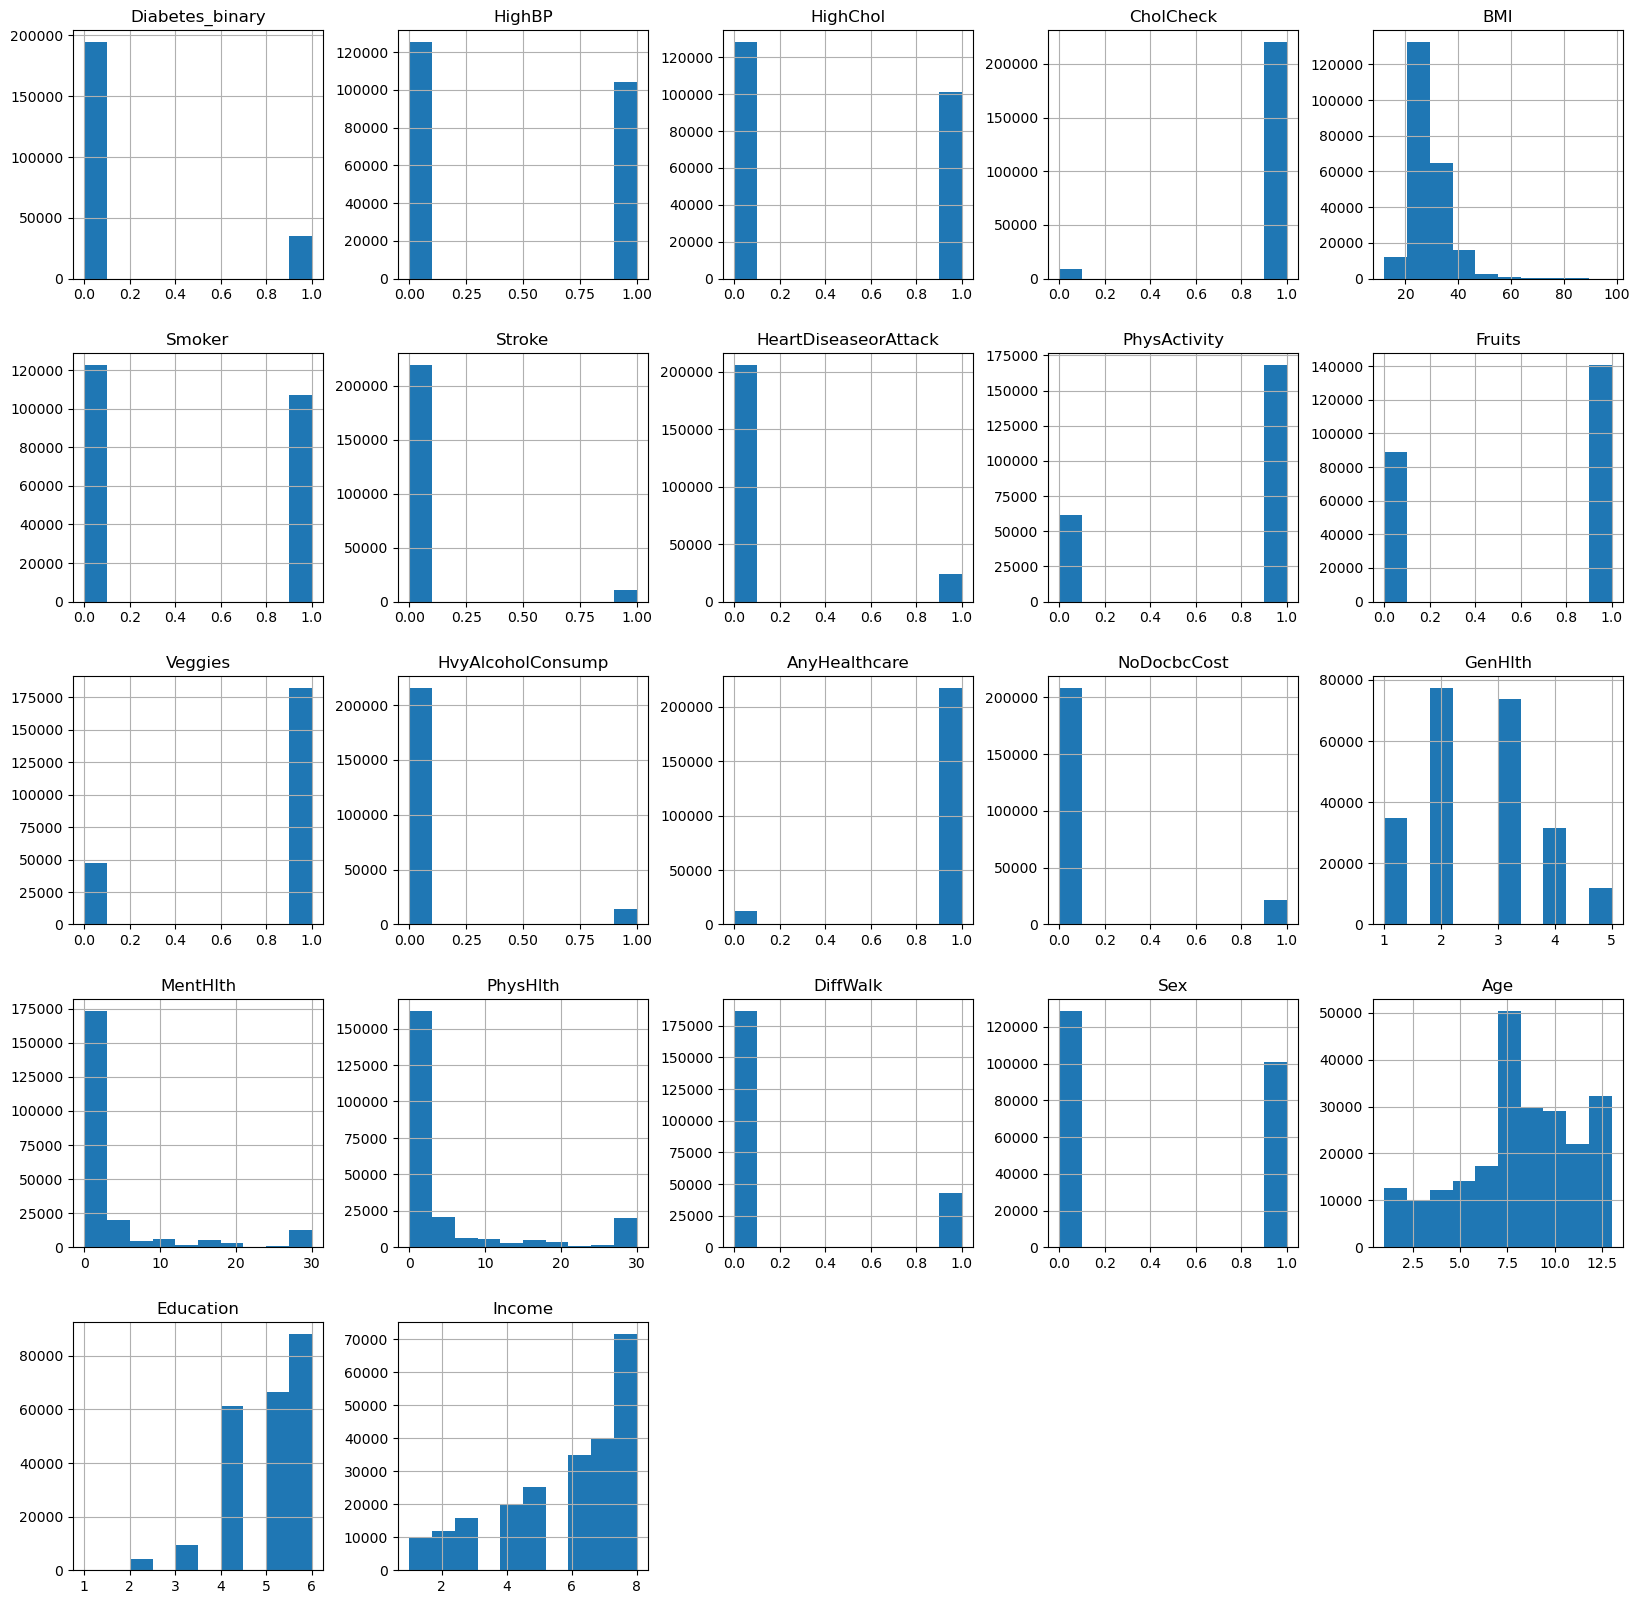

In [8]:
db.drop_duplicates(inplace = True)
db.hist(figsize = (20,20))

Plotting correlation heatmap.
Approach from kaggle notebook: https://www.kaggle.com/code/bharat04/diabetes-detailed-eda-with-conclusion

Text(0.5, 1.0, 'Correlation of Features')

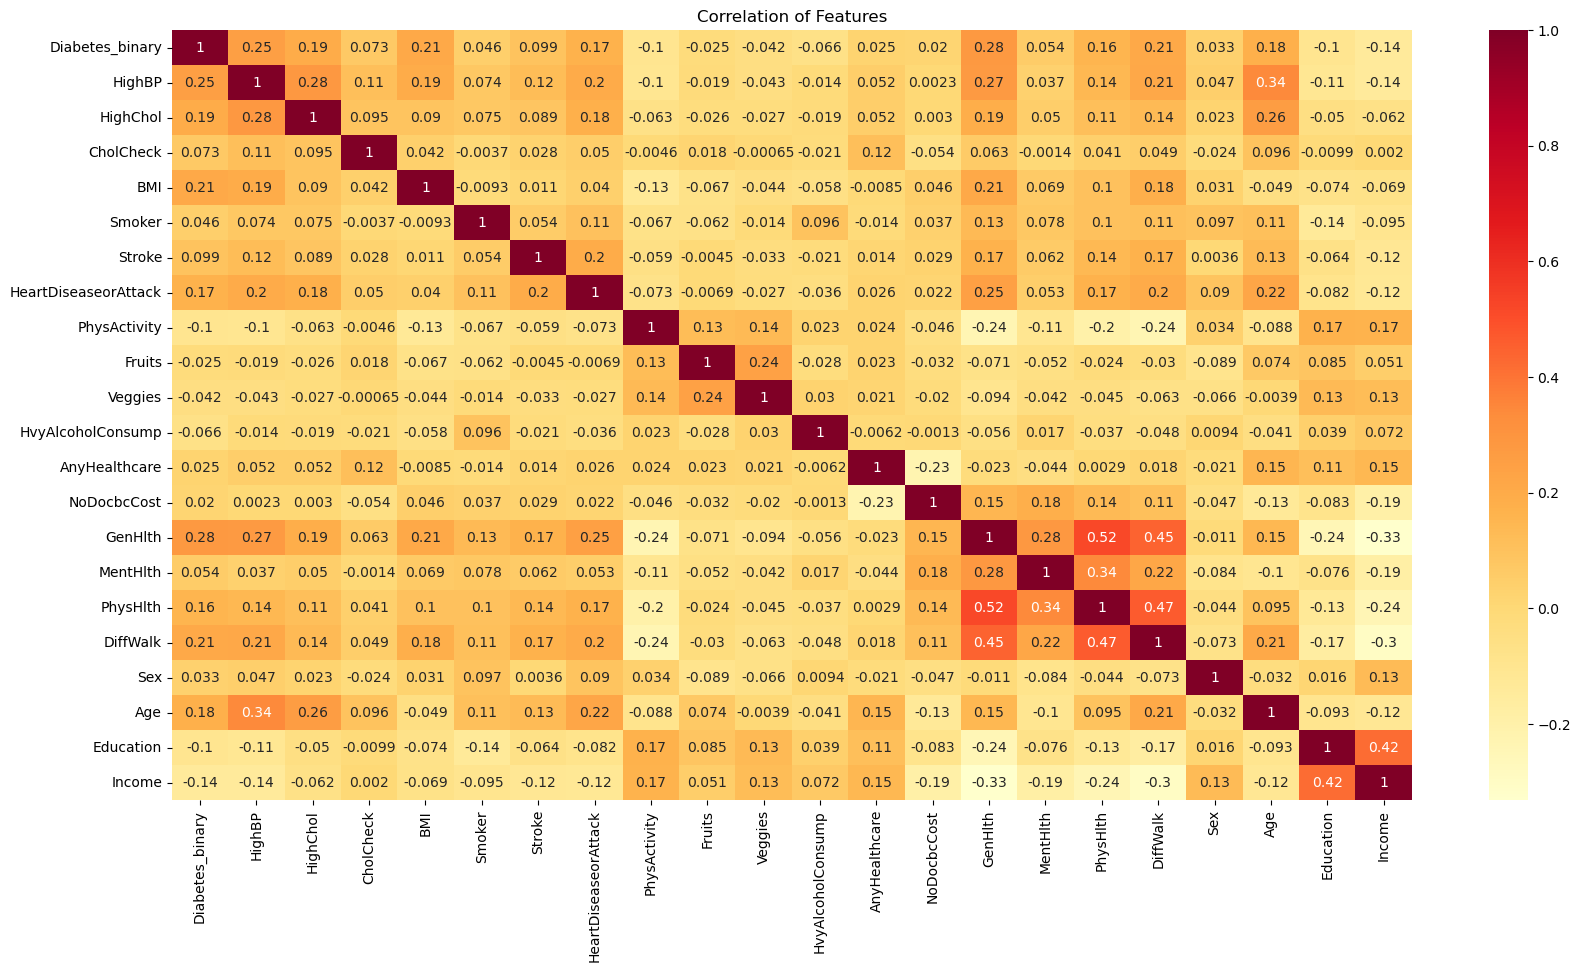

In [9]:


plt.figure(figsize = (20,10))
sns.heatmap(db.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of Features")

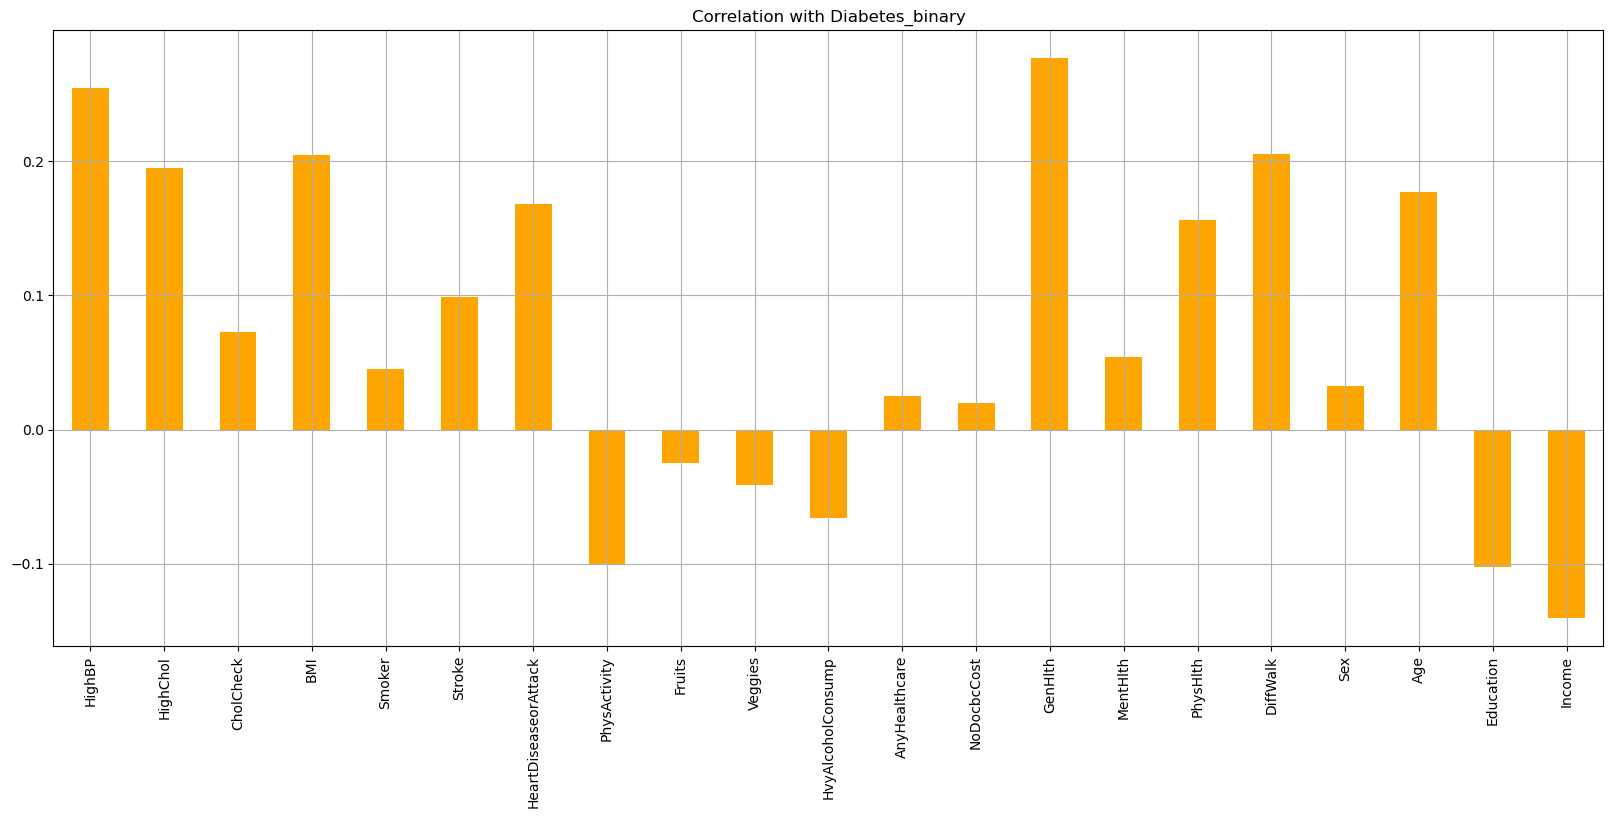

In [10]:
db.drop('Diabetes_binary', axis=1).corrwith(db.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Orange");

## Feature Selection
### Selecting K Best features using Chi Squared analysis
Approach from: https://www.kaggle.com/code/abdallahsaadelgendy/diabetes-prediction-eda-preprocessing-models#Data-Splitting

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification


X = db.iloc[:,1:]
Y = db.iloc[:,0]


#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8098.548237
1,HighChol,4869.312739
2,CholCheck,48.904140
3,BMI,15507.736174
4,Smoker,253.826098
5,Stroke,2156.678382
6,HeartDiseaseorAttack,5822.145697
7,PhysActivity,617.563886
8,Fruits,54.688897
9,Veggies,82.098846


In [12]:
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


### Following up on the results of the Feature Selection/Feature Ranking, we create a copy of the dataset with reduced features in order to evaluate if this leads to more accurate models, compared with the full dataset.

#### We drop the lowest ranking features, i.e Fruits, Veggies, Sex, CholCheck, and AnyHealthcare.

In [13]:
from sklearn.model_selection import train_test_split

droppable_columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
reduced_db = db.drop(columns = droppable_columns)
reduced_features = reduced_db.iloc[:,1:]
reduced_labels = reduced_db.iloc[:,0]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced_features.values, reduced_labels.values, test_size=0.3 , random_state=42)













## Setting up MLFlow for Model Tracking

In [14]:
import mlflow

In [15]:
from mlflow import MlflowClient
from pprint import pprint


client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

In [16]:
all_experiments = client.search_experiments()

print(all_experiments)

[<Experiment: artifact_location='mlflow-artifacts:/184743792099733090', creation_time=1707989596800, experiment_id='184743792099733090', last_update_time=1707989596800, lifecycle_stage='active', name='Diabetes_Risk_Models', tags={'dataset': 'diabetes_binary_health_indicators_BRFSS2015.csv',
 'mlflow.note.content': 'This is the Diabetes Risk Prediction Project.',
 'project_name': 'diabetes_risk_predictor'}>, <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1707932340608, experiment_id='0', last_update_time=1707932340608, lifecycle_stage='active', name='Default', tags={}>]


In [17]:

default_experiment = [
    {"name": experiment.name, "lifecycle_stage": experiment.lifecycle_stage}
    for experiment in all_experiments
    if experiment.name == "Default"
][0]

pprint(default_experiment)

{'lifecycle_stage': 'active', 'name': 'Default'}


In [ ]:
# Provide an Experiment description that will appear in the UI
experiment_description = "This is the Diabetes Risk Prediction Project."


# Provide searchable tags that define characteristics of the Runs that
# will be in this Experiment
experiment_tags = {
    "project_name": "diabetes_risk_predictor",
    "dataset": "diabetes_binary_health_indicators_BRFSS2015.csv",
    "mlflow.note.content": experiment_description,
}


# Create the Experiment, providing a unique name
produce_diabetes_experiment = client.create_experiment(
    name="Diabetes_Risk_Models", tags=experiment_tags
)

In [18]:
# Use search_experiments() to search on the project_name tag key

diabetes_experiment = client.search_experiments(filter_string = "name = 'Diabetes_Risk_Models'")

experiment_id = diabetes_experiment[0].experiment_id

# Splitting Data


In [19]:
features = db.iloc[:,1:]
labels = db.iloc[:,0]
print(features.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [20]:
X_train , X_test , y_train , y_test = train_test_split(features.values,labels.values, test_size=0.3 , random_state=42)

## A Logistic Regression Model Trained with the Full Dataset.

In [21]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Sets the current active experiment to the "Diabetes_Risk_Models" experiment and
# returns the Experiment metadata
diabetes_experiment = mlflow.set_experiment("Diabetes_Risk_Models")


# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "logistic_all_features_test_1"
# current_run = client.create_run(experiment_id = experiment_id, run_name = run_name)


# Define an artifact path that the model will be saved to.
artifact_path = 'logistic_1'


params = {
    "penalty": "l2",
    "solver" : "lbfgs",
    "max_iter":1000,
    "verbose":1
}



# Train the RandomForestRegressor
lr = LogisticRegression(**params)

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the validation set
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
# Assemble the metrics we're going to write into a collection
metrics = classification_report(y_test, y_pred, output_dict = True)


# Initiate the MLflow run context
with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics['macro avg'])
    mlflow.log_metric('accuracy', metrics['accuracy'])                         
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(
        sk_model=lr, input_example=X_test, artifact_path=artifact_path
    )


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11341D+05    |proj g|=  1.52194D+06

At iterate   50    f=  5.84075D+04    |proj g|=  2.58174D+04

At iterate  100    f=  5.66023D+04    |proj g|=  4.04864D+03

At iterate  150    f=  5.57084D+04    |proj g|=  8.55657D+02

At iterate  200    f=  5.55830D+04    |proj g|=  6.50373D+02

At iterate  250    f=  5.55710D+04    |proj g|=  1.24730D+02

At iterate  300    f=  5.55691D+04    |proj g|=  2.08133D+02

At iterate  350    f=  5.55687D+04    |proj g|=  1.83098D+02


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22    386    441      1     0     0   5.115D+01   5.557D+04
  F =   55568.626179602332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.54      0.15      0.23     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843

Run name is  logistic_all_features_test_1


/Users/sagar/anaconda3/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [22]:

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "logistic_reduced_features_test_1"
# current_run = client.create_run(experiment_id = experiment_id, run_name = run_name)


# Define an artifact path that the model will be saved to.
artifact_path = 'logistic_reduced'


params_reduced = {
    "penalty": "l2",
    "solver" : "lbfgs",
    "max_iter":1000,
    "verbose":1
}

# Train the RandomForestRegressor
lr_reduced = LogisticRegression(**params_reduced)

# Fit the model on the training data
lr_reduced.fit(X_train_reduced, y_train_reduced)

# Predict on the validation set
y_pred_reduced = lr_reduced.predict(X_test_reduced)

print(classification_report(y_test_reduced, y_pred_reduced))
# Assemble the metrics we're going to write into a collection
metrics_reduced = classification_report(y_test_reduced, y_pred_reduced, output_dict = True)


# Initiate the MLflow run context
with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params_reduced)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics_reduced['macro avg'])
    mlflow.log_metric('accuracy', metrics_reduced['accuracy'])                         
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(
        sk_model=lr_reduced, input_example=X_test_reduced, artifact_path=artifact_path
    )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11341D+05    |proj g|=  1.52194D+06

At iterate   50    f=  5.75221D+04    |proj g|=  6.11484D+03

At iterate  100    f=  5.61328D+04    |proj g|=  1.99933D+03

At iterate  150    f=  5.59418D+04    |proj g|=  1.12711D+03

At iterate  200    f=  5.58950D+04    |proj g|=  8.89650D+02

At iterate  250    f=  5.58888D+04    |proj g|=  2.34708D+02

At iterate  300    f=  5.58875D+04    |proj g|=  5.04670D+01

At iterate  350    f=  5.58866D+04    |proj g|=  3.55836D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.53      0.14      0.22     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843

Run name is  logistic_reduced_features_test_1



### It's clear that the model performs suboptimally, and especially struggles with detecting the minority class( the risk of diabetes), which is underrepresented in the imbalanced dataset.

### Now, we try an XGBoost Model

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
import xgboost as xgb

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "xgboost_all_features_test_1"


# Define an artifact path that the model will be saved to.
artifact_path = 'xgboost_1'



xg_params = {"learning_rate":0.1, "max_depth":9, "n_estimators":180, "verbose":1}
xg_model = xgb.XGBClassifier(**xg_params)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Assemble the metrics we're going to write into a collection
xg_metrics = classification_report(y_test, y_pred, output_dict = True)
# pipeline = Pipeline(steps =
#  [('model', model)])


with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(xg_params)

    # Log the error metrics that were calculated during validation

    mlflow.log_metrics(xg_metrics['macro avg'])
    mlflow.log_metric('accuracy', xg_metrics["accuracy"])
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.xgboost.log_model(xgb_model = xg_model, artifact_path=artifact_path)


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.54      0.17      0.26     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Run name is  xgboost_all_features_test_1


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
import xgboost as xgb

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "xgboost_reduced_features_test_1"


# Define an artifact path that the model will be saved to.
artifact_path = 'xgboost_reduced'



xg_params_reduced = {"learning_rate":0.1, "max_depth":9, "n_estimators":180, "verbose":1}
xg_model_reduced = xgb.XGBClassifier(**xg_params_reduced)
xg_model_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = xg_model_reduced.predict(X_test_reduced)
print(classification_report(y_test_reduced, y_pred_reduced))

# Assemble the metrics we're going to write into a collection
xg_metrics_reduced = classification_report(y_test_reduced, y_pred_reduced, output_dict = True)
# pipeline = Pipeline(steps =
#  [('model', model)])


with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(xg_params_reduced)

    # Log the error metrics that were calculated during validation

    mlflow.log_metrics(xg_metrics_reduced['macro avg'])
    mlflow.log_metric('accuracy', xg_metrics_reduced["accuracy"])
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.xgboost.log_model(xgb_model = xg_model_reduced, input_example = X_test_reduced, artifact_path=artifact_path)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.55      0.17      0.26     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Run name is  xgboost_reduced_features_test_1


2024/02/15 19:06:45 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/9l/4_6f0kzj54dg_yn6cg1lkzrr0000gn/T/tmp6xxc96n6/model, flavor: xgboost), fall back to return ['xgboost==0.80']. Set logging level to DEBUG to see the full traceback.


In [ ]:
print(classification_report(y_test_reduced, y_pred_reduced))

### Two observations at this stage: 
### 1. The reduced featureset gives us slightly better results.
### 2. The imbalance in the data makes the model bad at predicting the minority class, i.e. positive for diabetes risk.

### Now let's try balancing the dataset using SMOTENN = SMOTE + ENN techniques.



In [ ]:
# !pip install imblearn
# !pip install --upgrade pip

# Balancing the Imbalanced Dataset

### We use SMOTEENN to balance the dataset.
Imbalanced Dataset balanced using SMOTEENN methods. Source:
https://www.kaggle.com/code/jorgemetri/94-accuracy-with-smoteenn-resampling

SMOTEENN is an under/oversampling method that introduce new observations in the minority class and delete redundant observations in the majority class; it uses the k-nearest neighbors to interpolate the new data points

We do this with the reduced feature dataset.

In [ ]:
# import imblearn
# from imblearn.combine import SMOTEENN
# resampler = SMOTEENN(sampling_strategy = 'all',random_state = 123)
# resampler.fit(reduced_features,reduced_labels)

# Xr, yr = resampler.fit_resample(reduced_features,reduced_labels)
# features_df = pd.DataFrame(Xr)
# labels_df = pd.DataFrame(yr)
# df_balanced = pd.concat([features_df, labels_df], axis = 1)
# df_balanced.to_csv('data/reduced_features_balanced_db.csv')

In [44]:
balanced_db = pd.read_csv('data/reduced_features_balanced_db.csv')
balanced_db = balanced_db.drop(columns = ['Unnamed: 0'])



In [45]:
print(balanced_db.head(3))

   HighBP  HighChol   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity   
0     0.0       0.0  25.0     1.0     0.0                   0.0           1.0  \
1     1.0       0.0  27.0     0.0     0.0                   0.0           1.0   
2     1.0       1.0  25.0     1.0     0.0                   0.0           1.0   

   HvyAlcoholConsump  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk   
0                0.0          1.0      3.0       0.0       0.0       0.0  \
1                0.0          0.0      2.0       0.0       0.0       0.0   
2                0.0          0.0      2.0       0.0       2.0       0.0   

    Age  Education  Income  Diabetes_binary  
0   7.0        6.0     1.0              0.0  
1  11.0        3.0     6.0              0.0  
2  10.0        6.0     8.0              0.0  


In [46]:
balanced_db = balanced_db.sample(frac = 1)
balanced_db
Xr = balanced_db.iloc[:,:-1]
yr = balanced_db.iloc[:,-1]

## Compare the distribution of classes before and after Resampling

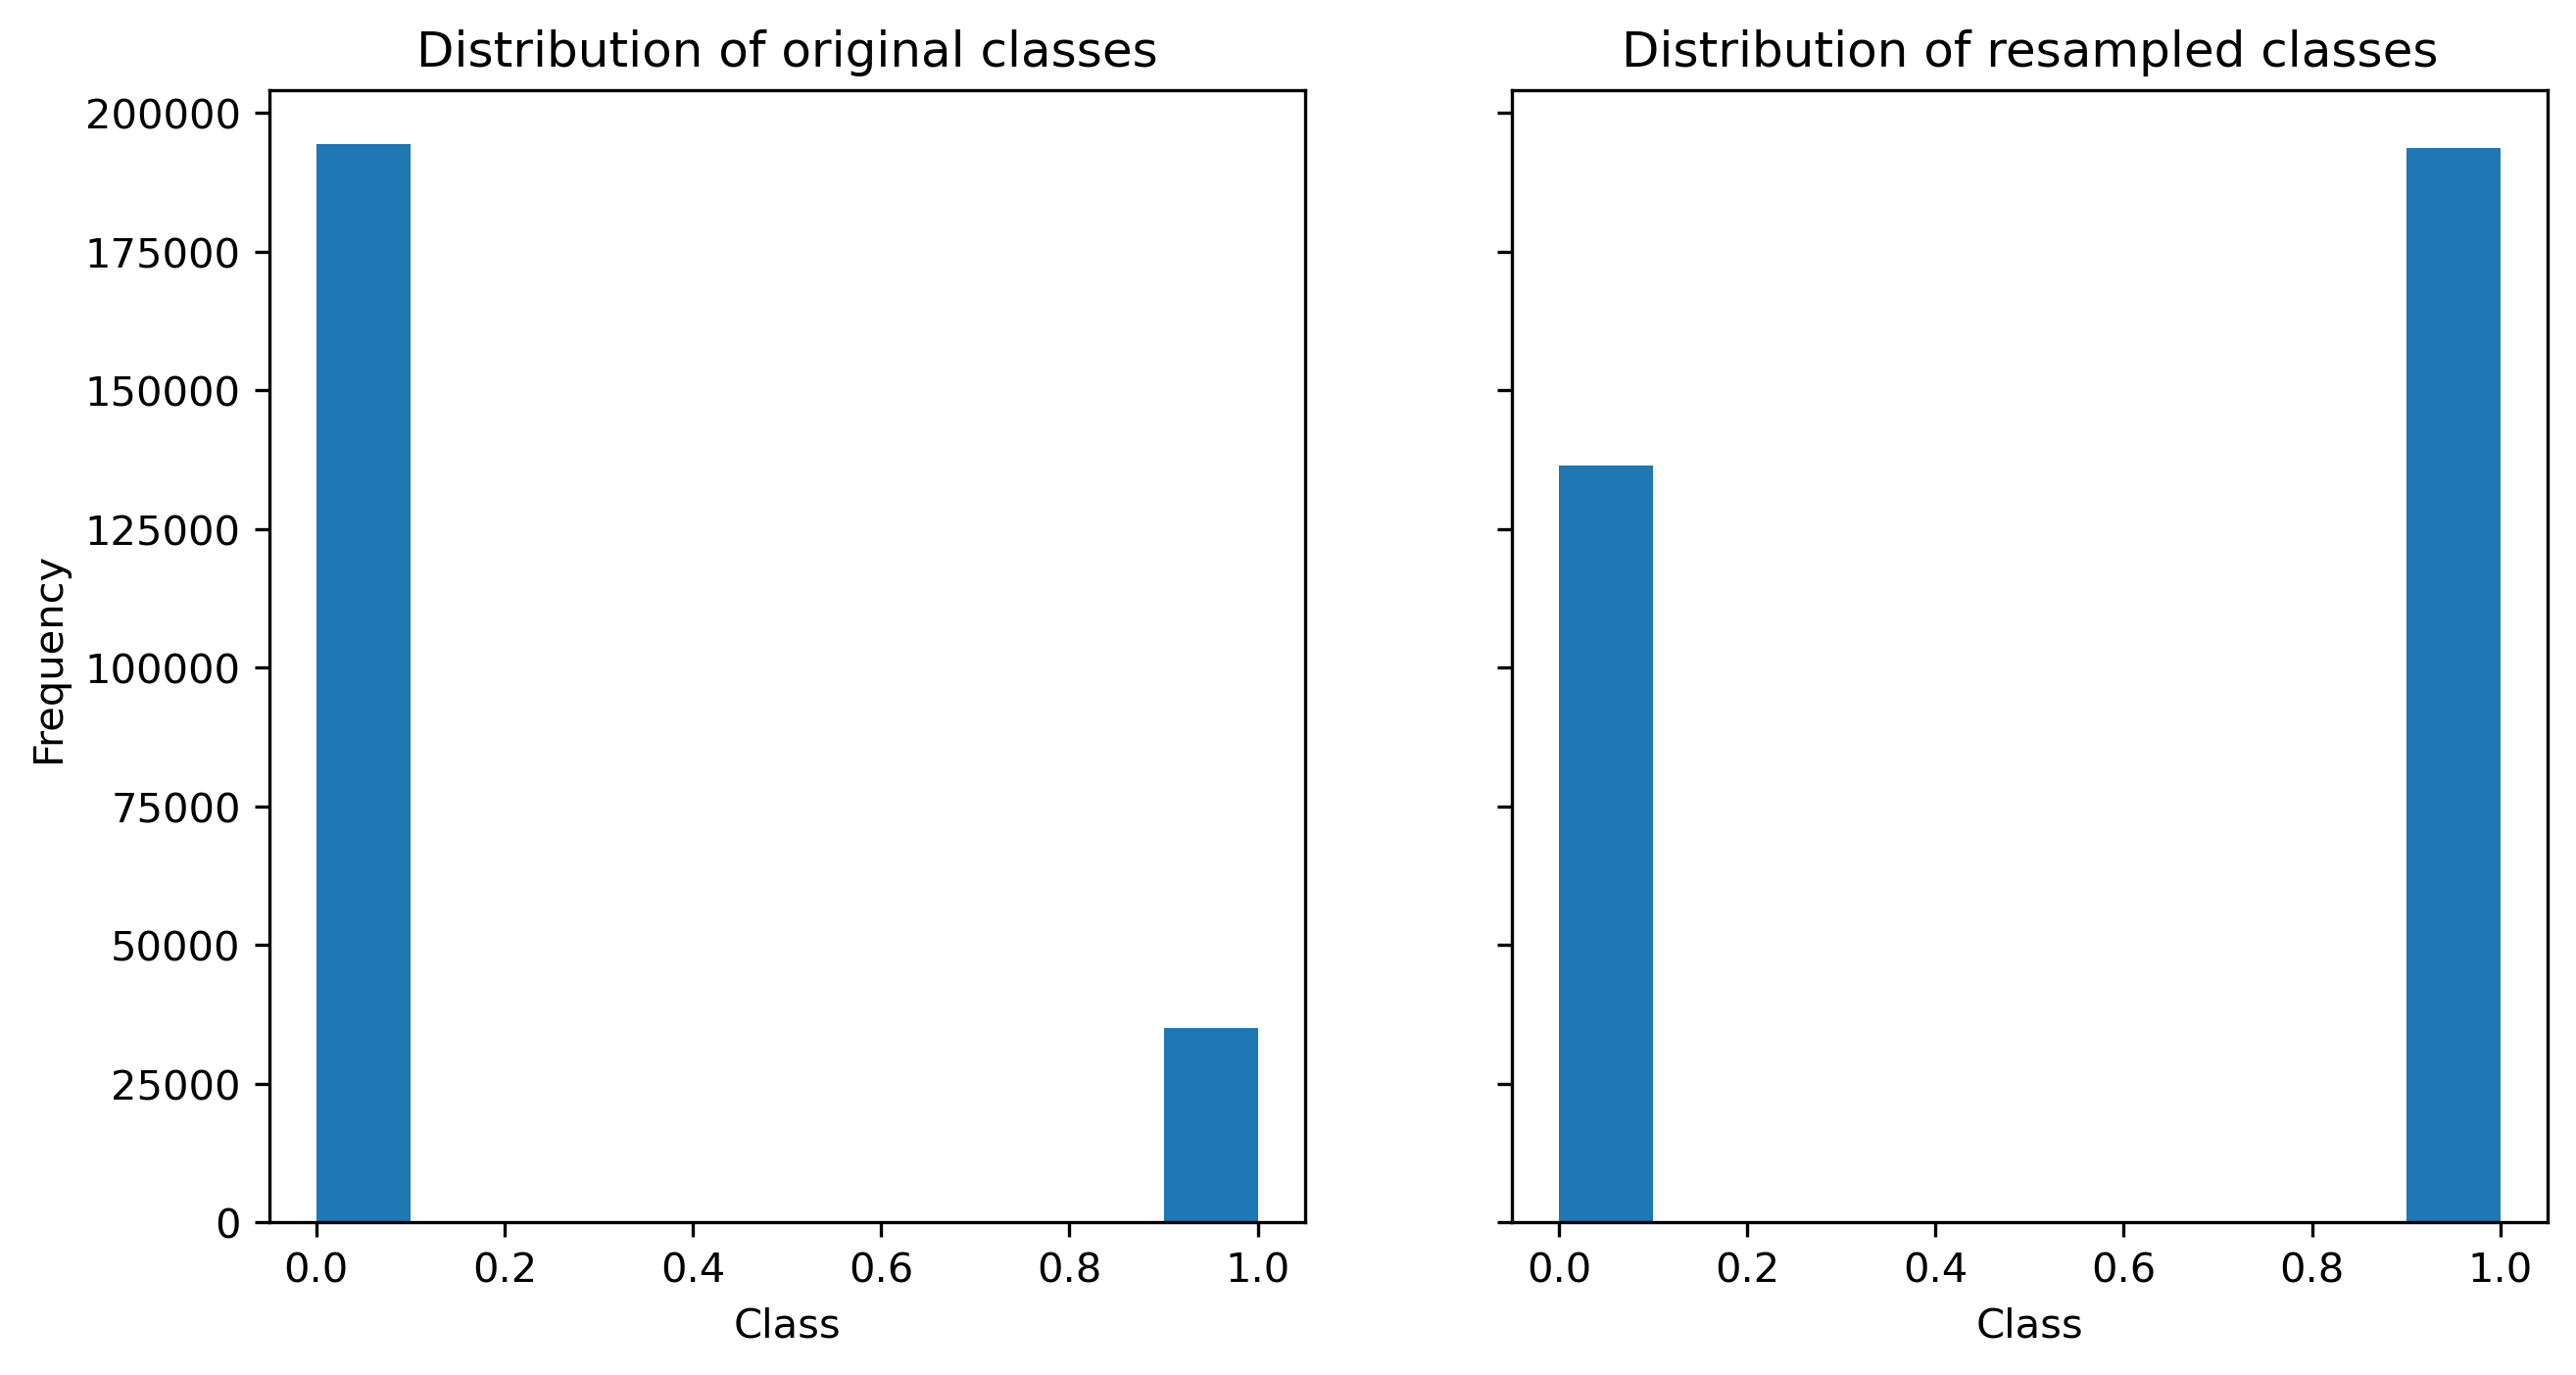

In [47]:
fig, ax = plt.subplots(1,2, figsize =(10,5), sharey = True, dpi = 300)
ax[0].hist(Y)
ax[1].hist(yr)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Class')
ax[1].set_xlabel('Class')
ax[0].set_title('Distribution of original classes')
ax[1].set_title('Distribution of resampled classes')
plt.show()

# Check Model Performance on Resampled Data

In [48]:
from sklearn.model_selection import train_test_split

X_train_bg , X_test_bg, y_train_bg , y_test_bg = train_test_split(Xr,yr, test_size=0.3 , random_state=42)

In [49]:
run_name = "xgboost_reduced_features_balanced_test_1"


# Define an artifact path that the model will be saved to.
artifact_path = 'xgboost_reduced_features_balanced_test'

# Assemble the metrics we're going to write into a collection

# pipeline = Pipeline(steps =
#  [('model', model)])
xg_params_2 = {"learning_rate":0.1, "max_depth":9, "n_estimators":180, "verbose":1}
xg_model_2 = xgb.XGBClassifier(**xg_params_2)
xg_model_2.fit(X_train_bg, y_train_bg)
y_pred_bg = xg_model_2.predict(X_test_bg)
print(classification_report(y_test_bg, y_pred_bg))
xg_metrics_2 = classification_report(y_test_bg, y_pred_bg, output_dict = True)


with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(xg_params_2)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(xg_metrics_2['macro avg'])
    mlflow.log_metric('accuracy', xg_metrics_2["accuracy"])
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.xgboost.log_model(xgb_model = xg_model_2, artifact_path=artifact_path)


              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     40936
         1.0       0.97      0.95      0.96     58136

    accuracy                           0.95     99072
   macro avg       0.95      0.95      0.95     99072
weighted avg       0.95      0.95      0.95     99072

Run name is  xgboost_reduced_features_balanced_test_1


# HyperParameter Fine-Tuning

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(xg_model, parameters, cv=10, n_jobs =10, scoring='roc_auc' )
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

# Obtain Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = xg_model_2.predict(X_test)
report2 = classification_report(y_test, y_pred, output_dict = True)
report2 = pd.DataFrame(report2)
report2.head()


# Train Model on Entire Dataset

In [55]:
xg_model_2.fit(np.array(Xr), np.array(yr))


XGBClassifier(max_depth=9, n_estimators=180, verbose=1)

# Evaluate Model Performance on 50-50 split dataset
available at: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

In [56]:
run_name = "xgboost_reduced_features_balanced_test_50-50_dataset"


# Define an artifact path that the model will be saved to.
artifact_path = 'xgboost_reduced_features_balanced_test_50-50_dataset'

# Assemble the metrics we're going to write into a collection

# pipeline = Pipeline(steps =
#  [('model', model)])


split_db = pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
droppable_columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
split_db.drop(columns = droppable_columns, inplace = True)

X_test_2 = np.array(split_db.iloc[:, 1:])
y_test_2 = np.array(split_db.iloc[:, 0])
y_pred_2 = xg_model_2.predict(X_test_2)

report_5050 = classification_report(y_test_2, y_pred_2)
print(report_5050)
xg_metrics_5050 = classification_report(y_test_2, y_pred_2, output_dict = True)


with mlflow.start_run(run_name = run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(xg_params_2)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(xg_metrics_5050['macro avg'])
    mlflow.log_metric('accuracy', xg_metrics_5050["accuracy"])
    
    print("Run name is ", run_name)

    # Log an instance of the trained model for later use
    mlflow.xgboost.log_model(xgb_model = xg_model_2, artifact_path=artifact_path)





              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77     35346
         1.0       0.80      0.67      0.73     35346

    accuracy                           0.75     70692
   macro avg       0.76      0.75      0.75     70692
weighted avg       0.76      0.75      0.75     70692

Run name is  xgboost_reduced_features_balanced_test_50-50_dataset


# Save Model by Pickling

In [57]:
# Use pickle to save model for next usage.
import pickle
filename = 'diabetes_model_v3.pk'
with open('./'+filename, 'wb') as file:
    pickle.dump(xg_model_2, file)

# Load Model

In [58]:
with open('./'+filename ,'rb') as f:
    loaded_model = pickle.load(f)
loaded_model.predict(X_test_2)

array([0., 1., 0., ..., 1., 1., 0.])